<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/jobs_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we import `pandas`, which we use for managing data, and `plotnine`, which we use to make visualizations

In [1]:
!pip install plotnine==0.7.1 # Contains the "reorder" function
                             # https://plotnine.readthedocs.io/en/stable/generated/plotnine.aes.html#plotnine.aes

In [2]:
import pandas as pd

from plotnine import *

In [3]:
jobs = pd.read_csv('https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/jobs_gender.csv')

OK, let's first get a high-level look at the data.

In [5]:
jobs

,year,occupation,major_category,minor_category,total_workers,workers_male,workers_female,percent_female,total_earnings,total_earnings_male,total_earnings_female,wage_percent_of_male
0,2013,Chief executives,"Management, Business, and Financial",Management,1024259,782400,241859,23.600000,120254,126142.0,95921.0,76.042080
1,2013,General and operations managers,"Management, Business, and Financial",Management,977284,681627,295657,30.300000,73557,81041.0,60759.0,74.973162
2,2013,Legislators,"Management, Business, and Financial",Management,14815,8375,6440,43.500000,67155,71530.0,65325.0,91.325318
3,2013,Advertising and promotions managers,"Management, Business, and Financial",Management,43015,17775,25240,58.700000,61371,75190.0,55860.0,74.291794
4,2013,Marketing and sales managers,"Management, Business, and Financial",Management,754514,440078,314436,41.700000,78455,91998.0,65040.0,70.697189
...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2016,Pumping station operators,"Production, Transportation, and Material Moving",Material Moving,19540,18917,623,3.188332,62096,62053.0,67083.0,NaN
2084,2016,Refuse and recyclable material collectors,"Production, Transportation, and Material Moving",Material Moving,65170,58851,6319,9.696179,32367,34488.0,24268.0,NaN
2085,2016,Mine shuttle car operators,"Production, Transportation, and Material Moving",Material Moving,732,722,10,1.366120,43866,43808.0,NaN,NaN
2086,2016,"Tank car, truck, and ship loaders","Production, Transportation, and Material Moving",Material Moving,4198,4155,43,1.024297,44079,44487.0,NaN,NaN


One question we might ask is "what's the mean earnings per major category, broken down by gender?"

In [6]:
breakdown_by_category = jobs[['major_category', 'total_earnings_male', 'total_earnings_female']]
breakdown_by_category = breakdown_by_category.groupby('major_category').mean().sort_values('total_earnings_male', ascending = False)

breakdown_by_category

,total_earnings_male,total_earnings_female
major_category,,
Healthcare Practitioners and Technical,81486.814516,68887.460938
"Computer, Engineering, and Science",80204.300847,69427.306383
"Management, Business, and Financial",73717.344828,59070.357759
"Education, Legal, Community Service, Arts, and Media",54402.952381,46257.660714
Sales and Office,44986.889286,37105.946429
"Natural Resources, Construction, and Maintenance",44270.042683,38549.106383
"Production, Transportation, and Material Moving",41299.601351,32437.850816
Service,36805.496324,31987.962825


One subtlety hiding in this data is that the rankings of category by salary aren't the same for males as they are for females. Namely, among males the earnings are highest in the healthcare sector, but among females the earnings are highest in the computer, engineering, and science field.

To visualize this data, we first choose to reshape it by restting the index, then melting it.

In [7]:
breakdown_by_category_vis = breakdown_by_category.reset_index('major_category').melt(id_vars = 'major_category', value_vars = ['total_earnings_male', 'total_earnings_female'])

breakdown_by_category_vis.sort_values('value', ascending = False)

,major_category,variable,value
0,Healthcare Practitioners and Technical,total_earnings_male,81486.814516
1,"Computer, Engineering, and Science",total_earnings_male,80204.300847
2,"Management, Business, and Financial",total_earnings_male,73717.344828
9,"Computer, Engineering, and Science",total_earnings_female,69427.306383
8,Healthcare Practitioners and Technical,total_earnings_female,68887.460938
10,"Management, Business, and Financial",total_earnings_female,59070.357759
3,"Education, Legal, Community Service, Arts, and...",total_earnings_male,54402.952381
11,"Education, Legal, Community Service, Arts, and...",total_earnings_female,46257.660714
4,Sales and Office,total_earnings_male,44986.889286
5,"Natural Resources, Construction, and Maintenance",total_earnings_male,44270.042683


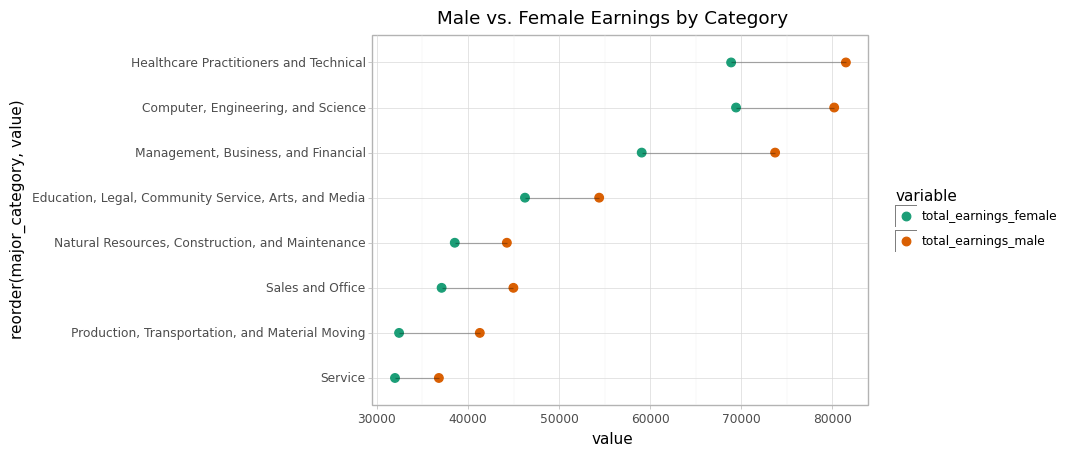

<ggplot: (-9223363248198718709)>

In [22]:
# Reorder values for plotting - https://plotnine.readthedocs.io/en/stable/generated/plotnine.aes.html#plotnine.aes

# major_category_cat = pd.Categorical(breakdown_by_category_vis[major_category_cat], categories = jobs.sort_values('major_category').index.tolist())

(
    ggplot() + 
    geom_point(
        aes(
            x = 'value',
            y = 'reorder(major_category, value)',
            color = 'variable'
        ),
        size = 3,
        data = breakdown_by_category_vis
    ) +
    geom_segment(
        aes(
            x = 'total_earnings_male',
            y = 'major_category',
            xend = 'total_earnings_female',
            yend = 'major_category'
        ),
        alpha = 0.3,
        data = breakdown_by_category.reset_index('major_category')
    ) +
    scale_color_brewer('qual', palette = 2) +
    theme_light() +
    ggtitle("Male vs. Female Earnings by Category")
)